In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

# Task 1

In [41]:
'''
    The function uses function f for each element of the image. Parameter params consist of the image as the 1st
    value, and addition parameters as others.
    params - [image, parameter1, ...]
    f - function for working with image elements
    returns an image which f has been applied to.
'''
def foreach(params, f):
    result = np.zeros(params[0].shape)
    image = params[0]
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            params[0] = image[i, j]
            result[i, j] = f(params)
    return result
'''
    The function makes processing with a threshold.
    params - [element, threshold]
    returns a new element after threshold
'''
def thresholdf(params):
    element = params[0]
    result = 0
    threshold = params[1]
    if element < threshold:
        result = 0
    else:
        result = 255
    return result
'''
    The function makes linear contrasting.
    params - [element, a, b]
    returns a new element after contrasting
'''
def contrast_linearf(params):
    element = params[0]
    a = params[1]
    b = params[2]
    return a * element + b
'''
    The function makes preparation. Values less a = 0. Values more b = 255. Other values = values from a line
    between a, b
    params - [element, a, b]
    return a new element after preparation
'''
def preparation(params):
    element = params[0]
    a = params[1]
    b = params[2]
    if element < a:
        return 0
    elif element > b:
        return 255
    else:
        return 255 * (element - a) / (b - a)

In [54]:
# Reading the image
image = cv2.imread('/home/qwerty/a.png', 0)

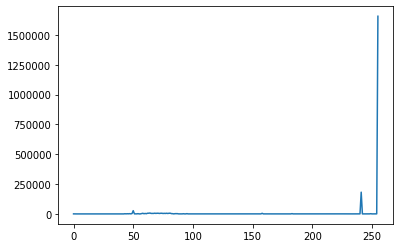

In [65]:
# Making and plotting the histogram of the image
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist)

In [56]:
# Making threshold for the image
threshold = 200
threshold_image = foreach([image, threshold], thresholdf)

# Task 2

In [57]:
# f_min, f_max are found from the histogram. g_min, g_max are set next
# Making linear contrasting
f_min = 0
f_max = 0
g_min = 0
g_max = 64

for i in range(hist.shape[0]):
    if hist[i] != 0:
        f_min = i
        break

for i in range(hist.shape[0] - 1, -1, -1):
    if hist[i] != 0:
        f_max = i
        break
a = (g_max - g_min) / (f_max - f_min)
b = (g_min * f_max - g_max * f_min) / (f_max - f_min)
c_image = foreach([image, a, b], contrast_linearf)

# Task 3

In [58]:
# Making preparation
# a, b are set next
a = 80
b = 205

prepared_image = foreach([image, a, b], preparation)